In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('cleaned_Indian_diab.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [2]:
# Compute the Pearson correlation between each feature and the target variable

correlation = data.corr()['Outcome'].sort_values(ascending=False)
data = df.copy()
correlation


Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

In [3]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Use RFE to rank the features
selector = RFE(rf, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Create a dataframe to display feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': selector.ranking_
}).sort_values(by='Rank')

feature_ranking


,Feature,Rank
1,Glucose,1
5,BMI,2
6,DiabetesPedigreeFunction,3
7,Age,4
4,Insulin,5
2,BloodPressure,6
0,Pregnancies,7
3,SkinThickness,8


In [ ]:
# Glucose and BMI consistently rank as the top two features.

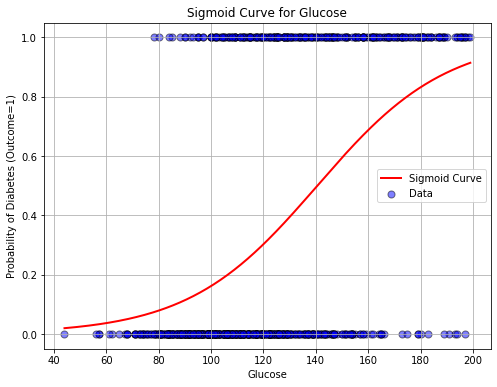

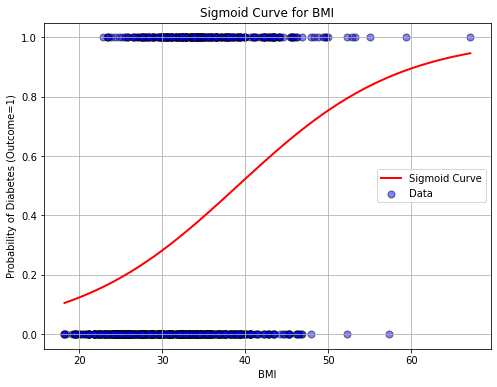

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Function to plot the sigmoid curve
def plot_sigmoid(X, y, feature_name):
    # Reshape the data
    X = X.values.reshape(-1, 1)
    
    # Fit logistic regression
    model = LogisticRegression()
    model.fit(X, y)
    
    # Predict probabilities
    X_test = np.linspace(X.min(), X.max(), 300)
    y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]
    
    # Plot the sigmoid curve
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', edgecolors='k', s=50, alpha=0.5, label='Data')
    plt.plot(X_test, y_prob, color='red', linewidth=2, label='Sigmoid Curve')
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Diabetes (Outcome=1)')
    plt.title(f'Sigmoid Curve for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot sigmoid curves for Glucose and BMI
plot_sigmoid(data['Glucose'], y, 'Glucose')
plot_sigmoid(data['BMI'], y, 'BMI')


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((614, 8), (154, 8))

In [6]:
from sklearn.model_selection import GridSearchCV
import time

# Define the hyperparameters to be tuned
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measure the start time
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

# Calculate the time taken for hyperparameter tuning
time_taken = time.time() - start_time

# Retrieve the best parameters
best_params = grid_search.best_params_

best_params, time_taken


({'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, 3.589604139328003)

In [7]:
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params, random_state=42)

# Perform 5-fold cross-validation
start_time = time.time()
cv_scores = cross_val_score(best_logreg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the time taken for cross-validation
cv_time_taken = time.time() - start_time

cv_mean_score = cv_scores.mean(), cv_scores.std(), cv_time_taken


In [8]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# Train the model on the entire training dataset
best_logreg.fit(X_train, y_train)

# Predictions on the test dataset
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

performance_metrics = accuracy, f1, roc_auc, fpr, tpr

performance_metrics


(0.7532467532467533,
 0.6415094339622642,
 0.8222222222222222,
 array([0.        , 0.        , 0.01010101, 0.01010101, 0.02020202,
        0.02020202, 0.03030303, 0.03030303, 0.05050505, 0.05050505,
        0.06060606, 0.06060606, 0.07070707, 0.07070707, 0.09090909,
        0.09090909, 0.13131313, 0.13131313, 0.17171717, 0.17171717,
        0.18181818, 0.18181818, 0.26262626, 0.26262626, 0.28282828,
        0.28282828, 0.32323232, 0.32323232, 0.35353535, 0.35353535,
        0.36363636, 0.36363636, 0.39393939, 0.39393939, 0.4040404 ,
        0.4040404 , 0.42424242, 0.42424242, 0.45454545, 0.45454545,
        0.49494949, 0.49494949, 0.54545455, 0.54545455, 0.5959596 ,
        0.5959596 , 0.60606061, 0.60606061, 0.64646465, 0.64646465,
        1.        ]),
 array([0.        , 0.01818182, 0.01818182, 0.07272727, 0.07272727,
        0.30909091, 0.30909091, 0.36363636, 0.36363636, 0.38181818,
        0.38181818, 0.47272727, 0.47272727, 0.58181818, 0.58181818,
        0.6       , 0.6       ,

In [ ]:
    # Accuracy: 75.32%
    # F1 Score: 64.15%
    # ROC-AUC: 82.22%

In [ ]:
#SVM

In [11]:
from sklearn.svm import SVC
# Reducing the hyperparameter search space
reduced_param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

svm = SVC(probability=True)
# Use GridSearchCV with the reduced parameter grid
grid_search_svm_reduced = GridSearchCV(svm, reduced_param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Measure the start time
start_time_svm = time.time()

# Fit the model
grid_search_svm_reduced.fit(X_train, y_train)

# Calculate the time taken for hyperparameter tuning
time_taken_svm_reduced = time.time() - start_time_svm

# Retrieve the best parameters
best_params_svm_reduced = grid_search_svm_reduced.best_params_

best_params_svm_reduced, time_taken_svm_reduced


({'C': 10, 'gamma': 0.1, 'kernel': 'linear'}, 157.35822343826294)

In [ ]:
# ({'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, 38.76822566986084)

In [13]:
# Initialize the SVM classifier with the best hyperparameters
best_svm = SVC(**best_params_svm_reduced, probability=True)

# Perform 5-fold cross-validation
start_time_svm_cv = time.time()
cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the time taken for cross-validation
cv_time_taken_svm = time.time() - start_time_svm_cv

cv_mean_score_svm = cv_scores_svm.mean(), cv_scores_svm.std(), cv_time_taken_svm

cv_mean_score_svm


(0.7687458349993336, 0.025868357759311608, 73.06344985961914)

In [14]:
# Train the SVM model on the entire training dataset
best_svm.fit(X_train, y_train)

# Predictions on the test dataset
y_pred_svm = best_svm.predict(X_test)
y_pred_proba_svm = best_svm.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

performance_metrics_svm = accuracy_svm, f1_svm, roc_auc_svm, fpr_svm, tpr_svm

performance_metrics_svm


(0.7662337662337663,
 0.660377358490566,
 0.8244260789715335,
 array([0.        , 0.01010101, 0.01010101, 0.02020202, 0.02020202,
        0.04040404, 0.04040404, 0.05050505, 0.05050505, 0.06060606,
        0.06060606, 0.07070707, 0.07070707, 0.11111111, 0.11111111,
        0.13131313, 0.15151515, 0.16161616, 0.16161616, 0.18181818,
        0.18181818, 0.32323232, 0.32323232, 0.37373737, 0.37373737,
        0.38383838, 0.38383838, 0.4040404 , 0.4040404 , 0.43434343,
        0.43434343, 0.47474747, 0.47474747, 0.51515152, 0.51515152,
        0.60606061, 0.60606061, 0.62626263, 0.62626263, 0.6969697 ,
        0.6969697 , 1.        ]),
 array([0.        , 0.        , 0.01818182, 0.01818182, 0.30909091,
        0.30909091, 0.4       , 0.4       , 0.49090909, 0.49090909,
        0.50909091, 0.50909091, 0.58181818, 0.58181818, 0.6       ,
        0.6       , 0.6       , 0.6       , 0.63636364, 0.63636364,
        0.69090909, 0.69090909, 0.78181818, 0.78181818, 0.8       ,
        0.8       , 

In [ ]:
(0.7662337662337663,
 0.660377358490566,
 0.8244260789715335,

In [ ]:
# Decison TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Extracting only 'Glucose' and 'BMI' features for training and testing data
X_train_dt = X_train[['Glucose', 'BMI']]
X_test_dt = X_test[['Glucose', 'BMI']]

# Define the hyperparameters to be tuned
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Measure the start time
start_time_dt = time.time()

# Fit the model
grid_search_dt.fit(X_train_dt, y_train)

# Calculate the time taken for hyperparameter tuning
time_taken_dt = time.time() - start_time_dt

# Retrieve the best parameters
best_params_dt = grid_search_dt.best_params_

best_params_dt, time_taken_dt


({'criterion': 'entropy',
  'max_depth': 3,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 2.2984306812286377)

In [ ]:
    # Criterion: entropy
    # Max Depth: 3
    # Min Samples Leaf: 4
    # Min Samples Split: 2

In [16]:
# Initialize the Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Perform 5-fold cross-validation
start_time_dt_cv = time.time()
cv_scores_dt = cross_val_score(best_dt, X_train_dt, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the time taken for cross-validation
cv_time_taken_dt = time.time() - start_time_dt_cv

cv_mean_score_dt = cv_scores_dt.mean(), cv_scores_dt.std(), cv_time_taken_dt

cv_mean_score_dt


(0.7557510329201652, 0.038535456106047826, 0.01382756233215332)

In [17]:
# Train the Decision Tree model on the entire training dataset
best_dt.fit(X_train_dt, y_train)

# Predictions on the test dataset
y_pred_dt = best_dt.predict(X_test_dt)
y_pred_proba_dt = best_dt.predict_proba(X_test_dt)[:, 1]

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

performance_metrics_dt = accuracy_dt, f1_dt, roc_auc_dt, fpr_dt, tpr_dt

performance_metrics_dt


(0.7727272727272727,
 0.6601941747572815,
 0.8088154269972452,
 array([0.        , 0.02020202, 0.04040404, 0.14141414, 0.48484848,
        0.56565657, 0.80808081, 0.85858586, 1.        ]),
 array([0.        , 0.10909091, 0.23636364, 0.61818182, 0.89090909,
        0.94545455, 1.        , 1.        , 1.        ]))

In [ ]:
    # Decison TREE 
    # Accuracy: 77.27%
    # F1 Score: 66.02%
    # ROC-AUC: 80.88%

In [18]:
# Creating a dataframe to hold the performance metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'Accuracy (%)': [accuracy * 100, accuracy_svm * 100, accuracy_dt * 100],
    'F1 Score (%)': [f1 * 100, f1_svm * 100, f1_dt * 100],
    'ROC-AUC': [roc_auc, roc_auc_svm, roc_auc_dt]
}

performance_metrics_df = pd.DataFrame(metrics_data)
performance_metrics_df


,Model,Accuracy (%),F1 Score (%),ROC-AUC
0,Logistic Regression,75.324675,64.150943,0.822222
1,SVM,76.623377,66.037736,0.824426
2,Decision Tree,77.272727,66.019417,0.808815


C:\Users\Hp\AppData\Local\Temp/ipykernel_36844/1891451939.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


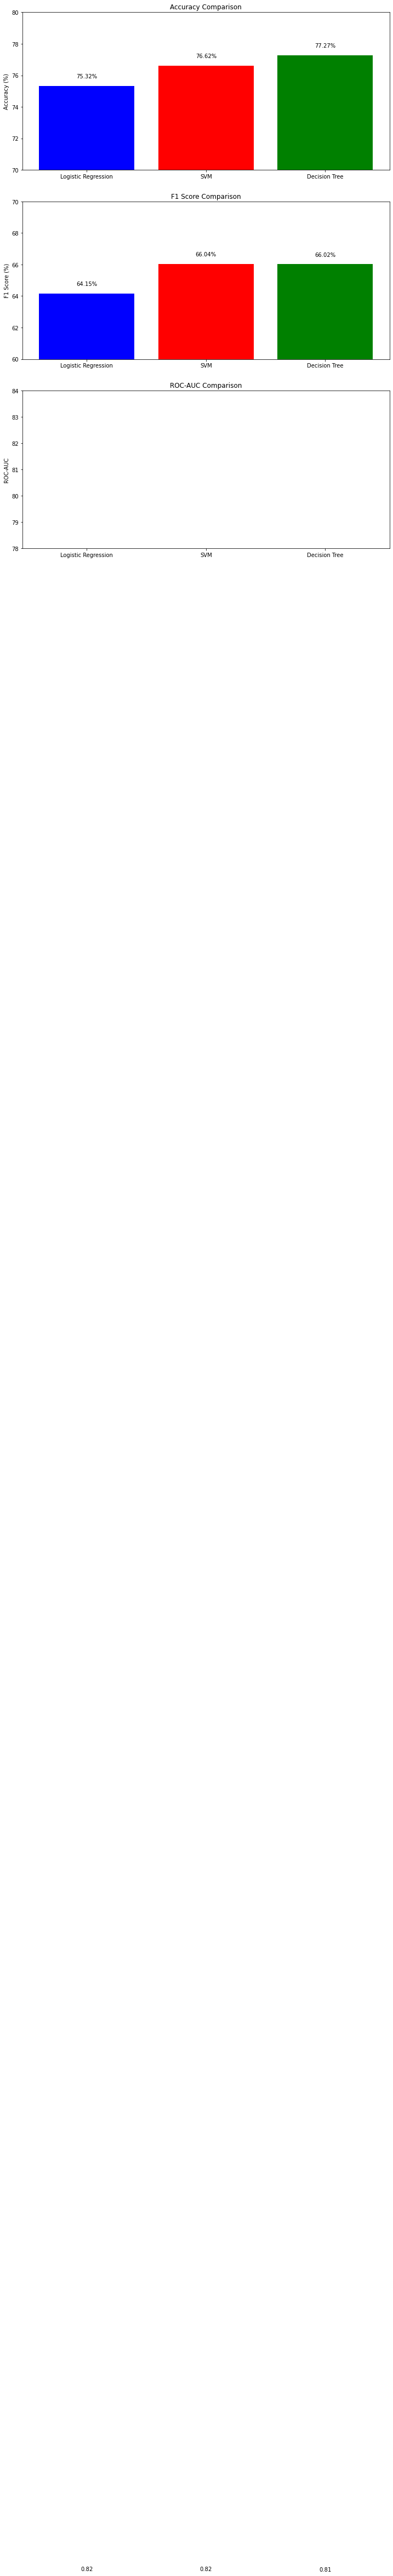

In [20]:
# Plotting the performance metrics for each model

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plotting Accuracy
axes[0].bar(performance_metrics_df['Model'], performance_metrics_df['Accuracy (%)'], color=['blue', 'red', 'green'])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(70, 80)
for i, v in enumerate(performance_metrics_df['Accuracy (%)']):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center')

# Plotting F1 Score
axes[1].bar(performance_metrics_df['Model'], performance_metrics_df['F1 Score (%)'], color=['blue', 'red', 'green'])
axes[1].set_title('F1 Score Comparison')
axes[1].set_ylabel('F1 Score (%)')
axes[1].set_ylim(60, 70)
for i, v in enumerate(performance_metrics_df['F1 Score (%)']):
    axes[1].text(i, v + 0.5, f"{v:.2f}%", ha='center')

# Plotting ROC-AUC
axes[2].bar(performance_metrics_df['Model'], performance_metrics_df['ROC-AUC'], color=['blue', 'red', 'green'])
axes[2].set_title('ROC-AUC Comparison')
axes[2].set_ylabel('ROC-AUC')
axes[2].set_ylim(78, 84)
for i, v in enumerate(performance_metrics_df['ROC-AUC']):
    axes[2].text(i, v + 0.2, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()
